In [13]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

# We can view all of the classes that automap found


In [19]:
# Save references to each table
Measurement=base.classes.measurement 
Station=base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

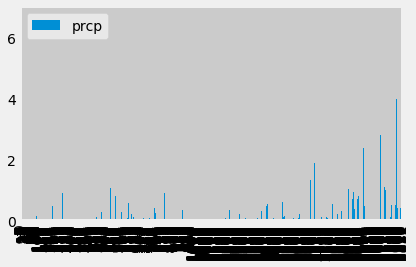

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
currentdate_minusoneyear=dt.datetime(2016,8,23)
currentdate=dt.datetime(2017,8,23)

# Calculate the date 1 year ago from the last data point in the database

##check
#for row in session.query(Measurement.prcp).filter(Measurement.date > currentdate):
    #print(row)
    
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_rainfall = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > currentdate_minusoneyear)
# Sort the dataframe by date

last_year_rainfall.group_by(Measurement.date)
last_year_rainfall_df=pd.DataFrame(last_year_rainfall)

filled=last_year_rainfall_df.fillna(0,limit=2200)
# Use Pandas Plotting with Matplotlib to plot the data
filled.plot.bar()
plt.tight_layout()
#this takes a minute 
plt.show()






In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data

filled_summary = filled.describe()
filled_summary

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station).count()
stations

9

In [63]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_count=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).all()
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).all()

avg_temp_active = session.query(Measurement.station, func.count(Measurement.station), func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
avg_temp_active

[('USC00519281', 2772, 71.66378066378067),
 ('USC00519397', 2724, 74.55323054331865),
 ('USC00513117', 2709, 72.68918420081211),
 ('USC00519523', 2669, 74.5436493068565),
 ('USC00516128', 2612, 70.91500765696784),
 ('USC00514830', 2202, 74.8732970027248),
 ('USC00511918', 1979, 71.61596766043456),
 ('USC00517948', 1372, 74.68440233236151),
 ('USC00518838', 511, 72.72407045009784)]

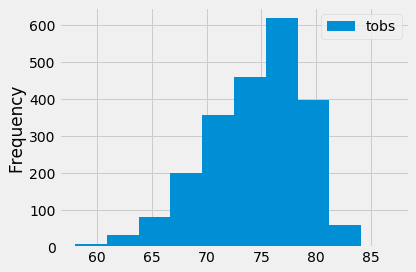

In [92]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()




currentdate_minusoneyear=dt.datetime(2016,8,23)
currentdate=dt.datetime(2017,8,23)
    

last_year_temps = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > currentdate_minusoneyear)

last_year_temps.group_by(Measurement.date)
last_year_temps_df=pd.DataFrame(last_year_temps)

last_year_temps_df.plot.hist()
#oh wow this worked first try
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
